In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from keras.layers import Dense

In [3]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.preprocessing import MinMaxScaler

### Data set:APPL (apple Stock) 2019 feb- 2022 aug

In [4]:
dir_path_dataset_1= 'D:\Downloads\Weather report 2012 -2016.csv'

### Load Dataset

In [5]:
df_ALL = pd.read_csv('D:\Downloads\Weather report 2012 -2016.csv')


In [6]:
df_ALL.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,01-12-2008,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71,22,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,02-12-2008,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44,25,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,03-12-2008,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38,30,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,04-12-2008,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45,16,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,05-12-2008,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82,33,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


### Breif Exploratory Data Analysis

In [7]:
df_ALL.shape

(499, 23)

In [8]:
df_ALL.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am        int64
Humidity3pm        int64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

### Statistics summary

In [9]:
df_ALL.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,499.000000,499.000000,494.000000,0.0,0.0,493.000000,496.000000,496.000000,499.000000,499.000000,499.000000,499.000000,164.000000,176.000000,499.000000,499.000000
mean,11.101403,24.850701,1.511336,NaN,NaN,35.259635,8.379032,14.915323,67.038076,40.981964,1016.783768,1014.002806,6.103659,5.113636,15.903407,23.591583
std,6.091239,8.211480,5.045560,NaN,NaN,14.738835,7.078883,7.875091,18.295998,20.658188,6.866398,6.707533,2.575531,2.921572,6.462068,7.992414
min,-2.000000,8.200000,0.000000,NaN,NaN,11.000000,0.000000,0.000000,20.000000,7.000000,994.300000,993.000000,0.000000,1.000000,1.900000,7.300000
25%,6.500000,17.650000,0.000000,NaN,NaN,24.000000,4.000000,9.000000,51.000000,24.000000,1011.600000,1008.800000,4.000000,2.000000,10.550000,16.650000
50%,11.300000,25.300000,0.000000,NaN,NaN,33.000000,7.000000,13.000000,68.000000,38.000000,1016.700000,1013.800000,8.000000,6.000000,16.000000,24.100000
75%,15.550000,31.300000,0.400000,NaN,NaN,44.000000,11.000000,20.000000,82.000000,56.000000,1021.950000,1019.050000,8.000000,8.000000,20.800000,29.700000
max,28.300000,44.800000,66.000000,NaN,NaN,107.000000,37.000000,50.000000,99.000000,97.000000,1036.300000,1033.600000,8.000000,8.000000,34.500000,43.400000


In [10]:
### Filtering all other atributes

In [11]:
df = df_ALL.iloc[:,3:4]


In [12]:
df.head()

,MaxTemp
0,22.9
1,25.1
2,25.7
3,28.0
4,32.3


<AxesSubplot:>

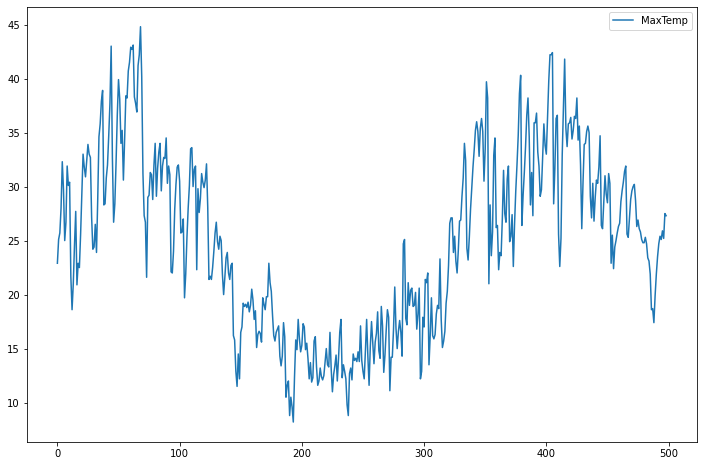

In [13]:
df.plot(figsize=(12,8))

In [14]:
length60=60

In [15]:
length60

60

###Time Series Dataste: Train / test Split 

In [16]:
len(df)

499

In [17]:
test_percent = 0.1

In [18]:
len(df)*test_percent

49.900000000000006

### Split-> Train /test

In [19]:
test_length= np.round(len(df)*test_percent)
test_length

50.0

In [20]:
split_index = int(len(df) - test_length)

split_index

449

In [21]:
data_train= df.iloc[: split_index]
data_test = df.iloc[split_index - length60 :]

In [22]:
data_train.head(5)

,MaxTemp
0,22.9
1,25.1
2,25.7
3,28.0
4,32.3


In [23]:
data_train.tail()

,MaxTemp
444,34.7
445,26.4
446,26.1
447,28.5
448,31.0


In [24]:
data_test.head(5)

,MaxTemp
389,27.3
390,35.9
391,35.9
392,36.8
393,33.2


In [25]:
data_test.tail()

,MaxTemp
494,25.1
495,25.9
496,25.2
497,27.5
498,27.3


### Normalize Data (scaling)

In [26]:
scaler = MinMaxScaler()

In [27]:
scaler.fit(data_train)

MinMaxScaler()

In [28]:
normalized_train= scaler.transform(data_train)
normalized_test = scaler.transform(data_test)

### Create TimeseriesGenerator for Training

In [29]:
batch_size32 = 32
train_tsGenerator60 = TimeseriesGenerator(normalized_train, normalized_train, length=length60, batch_size=batch_size32)

In [30]:
len(normalized_train)

449

In [31]:
len(train_tsGenerator60)

13

In [32]:
X,Y = train_tsGenerator60[0]

### Build, Train and test Model

In [33]:
n_features = 1

In [34]:
## Define Model
model = Sequential()

# Add an LSTM Layer
# This Layer has 50 LSTM Cells
# Activation Function: relu
# MUST: return_sequences=True
#-----> Because of multiple LSTM layers: the layers are stacked
#-----> Outputs = inputs of the next LSTM layer
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(length60, n_features)))

## Dropout Layer
model.add(Dropout(0.2))

## Add 2nd LSTM Layer
# MUST: return_sequences=True
#----> Because of multiple LSTM layers: Layers are Stacked
#----> Outputs = inputs of the next LSTM layer
model.add(LSTM(units=50, activation='relu', return_sequences=True))

## Dropout Layer
model.add(Dropout(0.2))

## Add 3rd LSTM Layer
model.add(LSTM(units=50, activation='relu'))

#Add a FC (fully-connected) layer for the final prediction
model.add(Dense(1))

##Procedure:
#Time Series Input---> LSTM --->Dropout --->LSTM --->Droput --->LSTM --->Dense --->Output

### Compile Model

In [35]:
model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            10400     
                                                                 
 dropout (Dropout)           (None, 60, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_1 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-traina

### Train (fit) model Using fit_generator()

In [36]:
## Train the Model

model.fit_generator(train_tsGenerator60, epochs=100)

Epoch 1/100


C:\Users\anand\AppData\Local\Temp\ipykernel_13768\1790817069.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(train_tsGenerator60, epochs=100)


13/13 [==============================] - 8s 69ms/step - loss: 0.1552
Epoch 2/100
13/13 [==============================] - 1s 74ms/step - loss: 0.0283
Epoch 3/100
13/13 [==============================] - 1s 75ms/step - loss: 0.0360
Epoch 4/100
13/13 [==============================] - 1s 79ms/step - loss: 0.0211
Epoch 5/100
13/13 [==============================] - 1s 79ms/step - loss: 0.0189
Epoch 6/100
13/13 [==============================] - 1s 80ms/step - loss: 0.0196
Epoch 7/100
13/13 [==============================] - 1s 79ms/step - loss: 0.0169
Epoch 8/100
13/13 [==============================] - 1s 79ms/step - loss: 0.0225
Epoch 9/100
13/13 [==============================] - 1s 81ms/step - loss: 0.0170
Epoch 10/100
13/13 [==============================] - 1s 79ms/step - loss: 0.0179
Epoch 11/100
13/13 [==============================] - 1s 79ms/step - loss: 0.0180
Epoch 12/100
13/13 [==============================] - 1s 79ms/step - loss: 0.0171
Epoch 13/100
13/13 [=================

### Visulaize Model's PErformance after Training 

In [37]:
loss_history_keys = model.history.history.keys()
loss_history_keys

dict_keys(['loss'])

<AxesSubplot:>

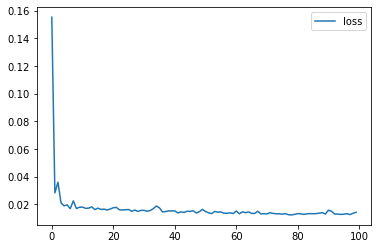

In [38]:
df_model_loss = pd.DataFrame(model.history.history)


df_model_loss.plot()

In [39]:
### Prediction for Testing : using Timeseries Genrator

In [40]:
batch_size1= 1
test_tsGenerator60 = TimeseriesGenerator(normalized_test, normalized_test, length=length60, batch_size=batch_size1)

In [41]:
normalized_prediction=model.predict_generator (test_tsGenerator60)

C:\Users\anand\AppData\Local\Temp\ipykernel_13768\2645534869.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  normalized_prediction=model.predict_generator (test_tsGenerator60)


In [42]:
normalized_prediction

array([[0.52023226],
       [0.5185394 ],
       [0.5166692 ],
       [0.51771766],
       [0.52002287],
       [0.514304  ],
       [0.5051535 ],
       [0.4906376 ],
       [0.47497135],
       [0.46033496],
       [0.4483832 ],
       [0.44009265],
       [0.43557218],
       [0.4367285 ],
       [0.44397965],
       [0.4564917 ],
       [0.47326392],
       [0.49254286],
       [0.5039204 ],
       [0.5071263 ],
       [0.5060204 ],
       [0.5046775 ],
       [0.50499296],
       [0.50745344],
       [0.51171064],
       [0.5151044 ],
       [0.51422256],
       [0.5105543 ],
       [0.50415576],
       [0.49584866],
       [0.48588985],
       [0.47491372],
       [0.46381772],
       [0.45383975],
       [0.44469795],
       [0.43515572],
       [0.42516404],
       [0.41391093],
       [0.3988708 ],
       [0.38110718],
       [0.36090344],
       [0.3415562 ],
       [0.3261082 ],
       [0.31692854],
       [0.31544527],
       [0.32178447],
       [0.33364806],
       [0.349

In [43]:
len(normalized_prediction)

50

In [44]:
prediction = scaler.inverse_transform(normalized_prediction)

In [45]:
prediction_index = np.arange(166, 166+len(prediction), step=1)

df_prediction = pd.DataFrame(data=prediction,index=prediction_index, columns=['prediction'])

In [46]:
df_prediction

,prediction
166,27.240501
167,27.178543
168,27.110094
169,27.148466
170,27.232838
171,27.023525
172,26.688618
173,26.157337
174,25.583952
175,25.048260


### Visulaize Predictions

<AxesSubplot:>

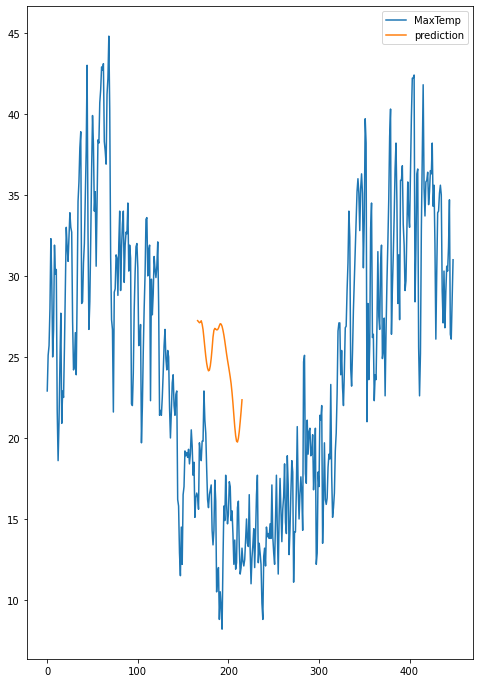

In [47]:
ax = data_train.plot()

df_prediction.plot(ax=ax, figsize=(8, 12))

In [48]:
full_scaler= MinMaxScaler()
normalized_full_data=full_scaler.fit_transform(df)

### Create Timeseries GEnerator for Forecasting

In [49]:
length60

60

In [50]:
forecast_tsGenerator = TimeseriesGenerator(normalized_train, normalized_train, length=length60, batch_size=batch_size32)

### Build Compile and Fit LTSM model for forecasting

In [51]:
model.fit_generator(forecast_tsGenerator, epochs=100)

Epoch 1/100
 1/13 [=>............................] - ETA: 1s - loss: 0.0061

C:\Users\anand\AppData\Local\Temp\ipykernel_13768\199224003.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(forecast_tsGenerator, epochs=100)


13/13 [==============================] - 1s 78ms/step - loss: 0.0145
Epoch 2/100
13/13 [==============================] - 1s 77ms/step - loss: 0.0138
Epoch 3/100
13/13 [==============================] - 1s 78ms/step - loss: 0.0136
Epoch 4/100
13/13 [==============================] - 1s 83ms/step - loss: 0.0134
Epoch 5/100
13/13 [==============================] - 1s 82ms/step - loss: 0.0131
Epoch 6/100
13/13 [==============================] - 1s 89ms/step - loss: 0.0126
Epoch 7/100
13/13 [==============================] - 1s 79ms/step - loss: 0.0129
Epoch 8/100
13/13 [==============================] - 1s 79ms/step - loss: 0.0124
Epoch 9/100
13/13 [==============================] - 1s 82ms/step - loss: 0.0130
Epoch 10/100
13/13 [==============================] - 1s 75ms/step - loss: 0.0126
Epoch 11/100
13/13 [==============================] - 1s 76ms/step - loss: 0.0132
Epoch 12/100
13/13 [==============================] - 1s 80ms/step - loss: 0.0131
Epoch 13/100
13/13 [=================

### Time Series Forecast Using LSTM Nueural Network 

In [52]:
periods = 50

# Selecting the last 60 timesteps from the training dataset
first_eval_batch = normalized_full_data[-length60:]
current_batch = first_eval_batch.reshape((1, length60, n_features))
forecast = []
# Generating the forecasts for the next 50 days
for i in range(periods):
    # Make a prediction with the current batch
    current_pred = model.predict(current_batch)[0]
    # Append the prediction to the forecast list
    forecast.append(current_pred)
    # Create a new batch with the predicted value and the previous 59 values
    current_batch = np.append(current_batch[:, 1:, :], [[current_pred]], axis=1)


1/1 [==============================] - 0s 36ms/step


###  inverse to transform

In [53]:
MaxTemp = full_scaler.inverse_transform(forecast)
MaxTemp

array([[24.15196472],
       [24.41626799],
       [24.47928585],
       [24.45028023],
       [24.3719044 ],
       [24.25668471],
       [24.10769275],
       [23.92558299],
       [23.71112769],
       [23.4655594 ],
       [23.18992745],
       [22.88542731],
       [22.55592902],
       [22.20211103],
       [21.8254786 ],
       [21.427441  ],
       [21.00769936],
       [20.56942344],
       [20.11302991],
       [19.64095118],
       [19.15517462],
       [18.6754889 ],
       [18.22025595],
       [17.79926211],
       [17.41960171],
       [17.0849512 ],
       [16.79364604],
       [16.53915857],
       [16.3171508 ],
       [16.12147302],
       [15.94287606],
       [15.77519876],
       [15.61402078],
       [15.45628362],
       [15.29980465],
       [15.14292865],
       [14.9854729 ],
       [14.829181  ],
       [14.67567546],
       [14.52566201],
       [14.38039556],
       [14.24099525],
       [14.10917575],
       [13.98582878],
       [13.87204017],
       [13

In [54]:
### creating new timestamp index with pandas 

In [55]:
MaxTemp_index = np.arange(1382, 1432, step=1)


In [56]:
forecast_df= pd.DataFrame(data=MaxTemp, index=MaxTemp_index, columns=['forecast'])

In [57]:
forecast_df

,forecast
1382,24.151965
1383,24.416268
1384,24.479286
1385,24.450280
1386,24.371904
1387,24.256685
1388,24.107693
1389,23.925583
1390,23.711128
1391,23.465559


### Plot the Forecast

<AxesSubplot:>

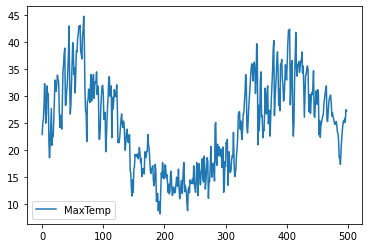

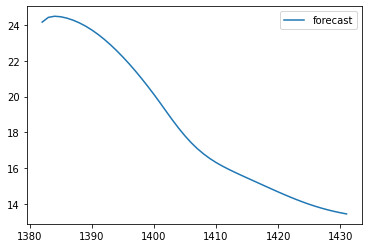

In [58]:
df.plot()
forecast_df.plot()

<AxesSubplot:>

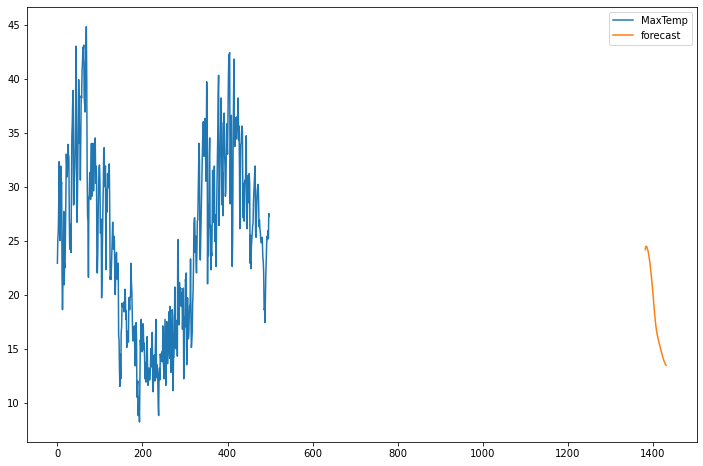

In [59]:
ax= df.plot()
forecast_df.plot(ax=ax, figsize=(12,8))

In [60]:
dir_path_dataset_2= 'D:\Downloads\Weather report 2017.csv'

In [61]:
df_ALL_forecast= pd.read_csv('D:\Downloads\Weather report 2017.csv')

In [62]:
df_ALL_forecast.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,23-04-2010,Albury,11.3,29.0,0.0,NaN,NaN,NNW,35,ESE,...,89,34,1020.5,1014.0,1.0,NaN,15.4,27.9,No,Yes
1,24-04-2010,Albury,15.4,19.8,3.6,NaN,NaN,NNW,46,NNE,...,95,86,1013.4,1008.7,8.0,8.0,17.1,18.6,Yes,Yes
2,25-04-2010,Albury,10.8,18.5,17.0,NaN,NaN,W,37,WSW,...,72,40,1016.2,1017.6,NaN,NaN,14.4,18.4,Yes,No
3,26-04-2010,Albury,5.1,17.9,0.0,NaN,NaN,SSE,15,E,...,78,49,1026.5,1023.0,NaN,NaN,10.4,16.9,No,No
4,27-04-2010,Albury,7.1,16.1,0.0,NaN,NaN,ENE,17,NaN,...,84,58,1020.9,1018.0,6.0,7.0,9.7,15.9,No,Yes


In [63]:
df_ALL_forecast = df_ALL_forecast.iloc[:, 3:4]


In [64]:
df_ALL_forecast

,MaxTemp
0,29.0
1,19.8
2,18.5
3,17.9
4,16.1
5,17.3
6,17.7
7,19.1
8,21.1
9,20.7


<AxesSubplot:>

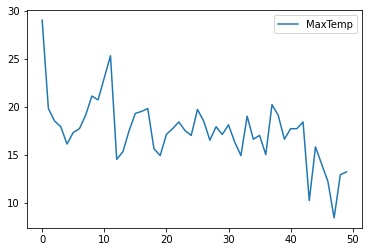

In [65]:
df_ALL_forecast.plot()

In [66]:
forecast_df['forecast'].values

array([24.15196472, 24.41626799, 24.47928585, 24.45028023, 24.3719044 ,
       24.25668471, 24.10769275, 23.92558299, 23.71112769, 23.4655594 ,
       23.18992745, 22.88542731, 22.55592902, 22.20211103, 21.8254786 ,
       21.427441  , 21.00769936, 20.56942344, 20.11302991, 19.64095118,
       19.15517462, 18.6754889 , 18.22025595, 17.79926211, 17.41960171,
       17.0849512 , 16.79364604, 16.53915857, 16.3171508 , 16.12147302,
       15.94287606, 15.77519876, 15.61402078, 15.45628362, 15.29980465,
       15.14292865, 14.9854729 , 14.829181  , 14.67567546, 14.52566201,
       14.38039556, 14.24099525, 14.10917575, 13.98582878, 13.87204017,
       13.76848076, 13.67469624, 13.59044282, 13.51542819, 13.449408  ])

In [69]:
df_ALL_forecast['forecast'] = forecast_df['forecast'].values

In [71]:
df_ALL_forecast

,MaxTemp,forecast
0,29.0,24.151965
1,19.8,24.416268
2,18.5,24.479286
3,17.9,24.450280
4,16.1,24.371904
5,17.3,24.256685
6,17.7,24.107693
7,19.1,23.925583
8,21.1,23.711128
9,20.7,23.465559


<AxesSubplot:>

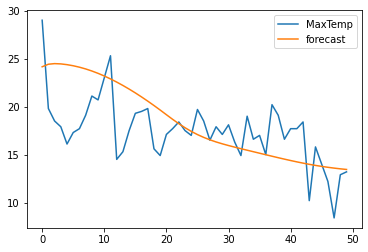

In [72]:
df_ALL_forecast.plot()